# Data analysis on BLS data Web-Scrapped using Requests library
# Time Series Data from 2000 - 2018

<h4>Format of SeriesID can be found here - <a href="https://www.bls.gov/help/hlpforma.htm#CE">Format of SeriesID</a></h4>
<p>Based on the SeriesID definitions, I retrieved the following data -</p>

<p>Seasonally adjusted (Seasonal Adjustment code) Average weekly earnings of all employees (Data type code) of Manufacturing, financial activities and Professional and business services (Super Sector Code) from Year <b>2000</b> to <b>2018</b> from this section.<p>


In [1]:
# Function to scrap BLS data from web

def get_bls_data(series,startyr,endyr):
    import pandas as pd
    import requests
    import json
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": series,"startyear":startyr, "endyear":endyr})
    
    p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
    
    json_data = json.loads(p.text)
    x = pd.DataFrame(columns=["series id","year","period","value"])
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            if 'M01' <= period <= 'M12':
                x.loc[len(x)] = [seriesId,str(year),str(period),str(value)]
    return x

In [2]:
# Calling get_bls_data for year 2000-2009 (Data request limit set to 10 years by the data source)
# Storing the scrapped data to a csv file

series = ['CES3000000011','CES5500000011','CES6000000011']
start = "2000"
end = "2009"
df1 =get_bls_data(series,start,end)
df1.to_csv('2000-2009' + '.csv')

In [3]:
# Calling get_bls_data again, this time for year 2010-2018 (Data request limit set to 10 years by the data source)
# Storing the scrapped data to a csv file

series = ['CES3000000011','CES5500000011','CES6000000011']
start = "2010"
end = "2018"
df2 =get_bls_data(series,start,end)
df2.to_csv('2010-2018' + '.csv')

In [4]:
# Appending df2 to df1

import pandas as pd
import numpy as np
df1 = pd.read_csv('2000-2009.csv')
df2 = pd.read_csv('2010-2018.csv')
df = df1.append(df2)
df = df.sort_values(by = 'year')
df.head()

,Unnamed: 0,series id,year,period,value
86,86,CES5500000011,2006,M08,908.05
36,36,CES3000000011,2006,M12,849.47
37,37,CES3000000011,2006,M11,842.69
38,38,CES3000000011,2006,M10,847.20
39,39,CES3000000011,2006,M09,839.50


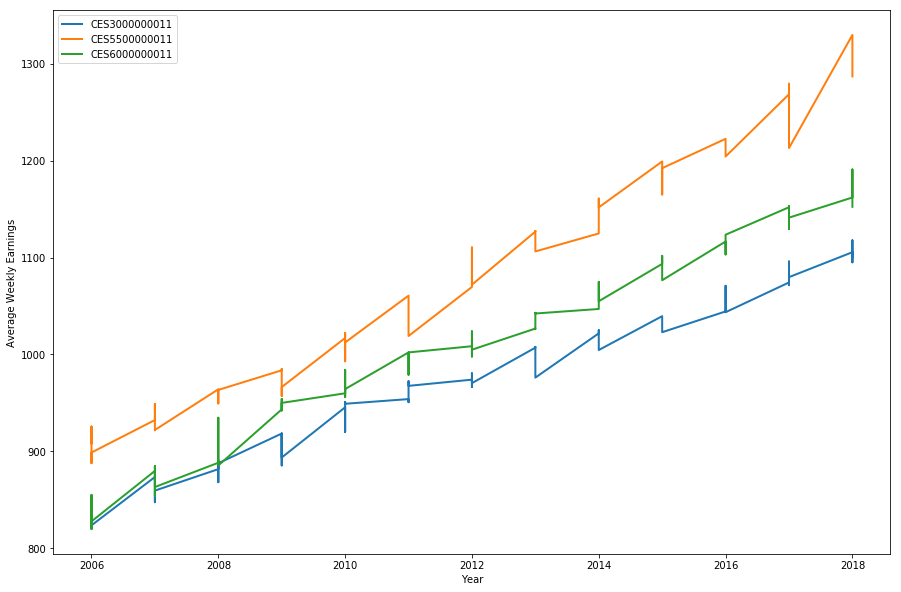

In [5]:
# Plotting Year vs Average Weekly Earnings

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.groupby('series id').plot(kind='line',x='year',y='value',ax=ax,linewidth=2.0)
ax.set_xlabel("Year")
ax.set_ylabel("Average Weekly Earnings")
ax.legend(['CES3000000011','CES5500000011','CES6000000011'])
plt.show()

<h4>From the plot we see that the seasonally adjusted average weekly earnings of all employees for all the three industries has increased gradually from 2006-2018.</h4>